# Test of Canopy optical modul
---
### with leaf optical properties (so far fixed within canopt, can be changed to mSCOPE approach later)
---
To be looked at here:
Computer leaf optical properties for standard values
Compute canopy radiation (both reflectance as well as within canopy distributions for SW energy balance).


In [1]:
# Add PATH (adapt!)
push!(LOAD_PATH, "/Volumes/cfranken/code/gitHub/LSM-SPAM/src/Leaf/");
push!(LOAD_PATH, "/Volumes/cfranken/code/gitHub/LSM-SPAM/src/Utils/");
#push!(LOAD_PATH, "/Volumes/cfranken/code/gitHub/LSM-SPAM/src/tools/");

In [2]:
# Use FluspectMod
using FluspectMod
using BenchmarkTools
using Statistics


┌ Info: Precompiling FluspectMod [top-level]
└ @ Base loading.jl:1273
ERROR: LoadError: LoadError: UndefVarError: CanopyRTMod not defined
Stacktrace:
 [1] top-level scope at /Volumes/cfranken/code/gitHub/LSM-SPAM/src/Leaf/PhotoStructs.jl:6
 [2] include at ./boot.jl:328 [inlined]
 [3] include_relative(::Module, ::String) at ./loading.jl:1105
 [4] include at ./Base.jl:31 [inlined]
 [5] include(::String) at /Volumes/cfranken/code/gitHub/LSM-SPAM/src/Leaf/FluspectMod.jl:1
 [6] top-level scope at /Volumes/cfranken/code/gitHub/LSM-SPAM/src/Leaf/FluspectMod.jl:16
 [7] include at ./boot.jl:328 [inlined]
 [8] include_relative(::Module, ::String) at ./loading.jl:1105
 [9] include(::Module, ::String) at ./Base.jl:31
 [10] top-level scope at none:2
 [11] eval at ./boot.jl:330 [inlined]
 [12] eval(::Expr) at ./client.jl:425
 [13] top-level scope at ./none:3
in expression starting at /Volumes/cfranken/code/gitHub/LSM-SPAM/src/Leaf/PhotoStructs.jl:6
in expression starting at /Volumes/cfranken/code/gi

ErrorException: Failed to precompile FluspectMod [top-level] to /Users/cfranken/.julia/compiled/v1.3/FluspectMod.ji.

In [3]:
# Use Plots:
using Plots
#plotly()

---
Run Fluspect, leaf optical property generator (provides reflectance and transmittance)

In [4]:
@time FluspectMod.fluspect!(FluspectMod.leaf, FluspectMod.optis)

UndefVarError: UndefVarError: FluspectMod not defined

In [5]:
FluspectMod.fluspect!(FluspectMod.leaf, FluspectMod.optis)
# Look at standard Leaf properties:
#FluspectMod.leaf

UndefVarError: UndefVarError: FluspectMod not defined

### Plot leaf reflectance and 1-Transmission

In [6]:
plot(FluspectMod.optis.lambda, FluspectMod.leaf.ρ_SW, label="Reflectance")
plot!(FluspectMod.optis.lambda, 1 .-FluspectMod.leaf.τ_SW, label="1-Transmission")

UndefVarError: UndefVarError: FluspectMod not defined

### Plot fluorescence excitation matrix (incoming wl on x, outgoing on y)

In [7]:
contour(FluspectMod.wle, FluspectMod.wlf, FluspectMod.leaf.Mb)

<!DOCTYPE html>
 
 
 Plots.jl

### Plot standard incoming diffuse and short-wave spectrum

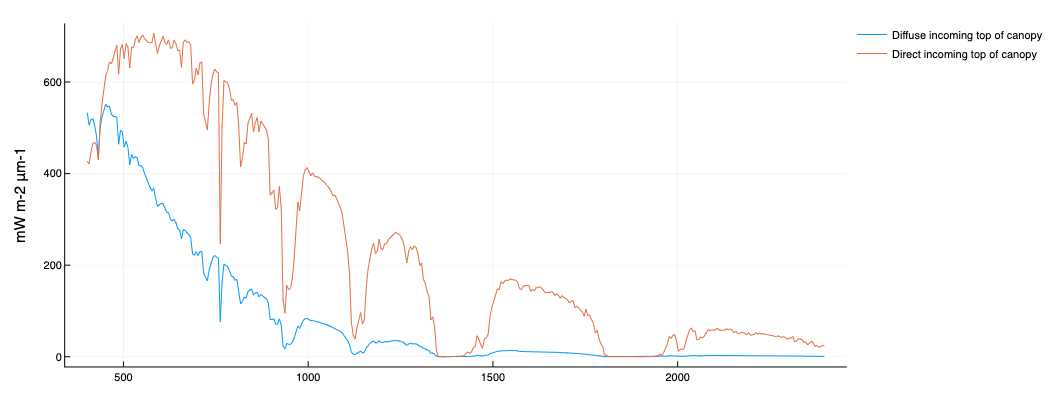

In [8]:
plot(FluspectMod.wl,FluspectMod.sunRad.E_diffuse, label="Diffuse incoming top of canopy")
plot!(FluspectMod.wl,FluspectMod.sunRad.E_direct, label="Direct incoming top of canopy")
ylabel!("mW m-2 μm-1")

### Compute canopy RT 
(basically PRO-SAIL with PROSPECT-D but also adding within canopy radiation via SCOPE)

In [9]:
@time FluspectMod.RTM_sail!(FluspectMod.leaf, FluspectMod.canopy, FluspectMod.angle, FluspectMod.canRad,FluspectMod.sunRad)

  6.554457 seconds (23.22 M allocations: 1.121 GiB, 5.16% gc time)


21-element Array{Float64,1}:
 0.9401370949135301  
 0.8026666228348429  
 0.6735909607160941  
 0.5634409436772871  
 0.4710163557135223  
 0.3937077070726573  
 0.32908078584463163 
 0.27506123339499394 
 0.22990897126681764 
 0.1921685834080407  
 0.16062341222537616 
 0.13425649483642949 
 0.11221780274207786 
 0.09379684212213951 
 0.07839974920927761 
 0.06553014511976553 
 0.05477313336742628 
 0.04578192423352819 
 0.038266654793404915
 0.031985044176129414
 0.02673458279727301 

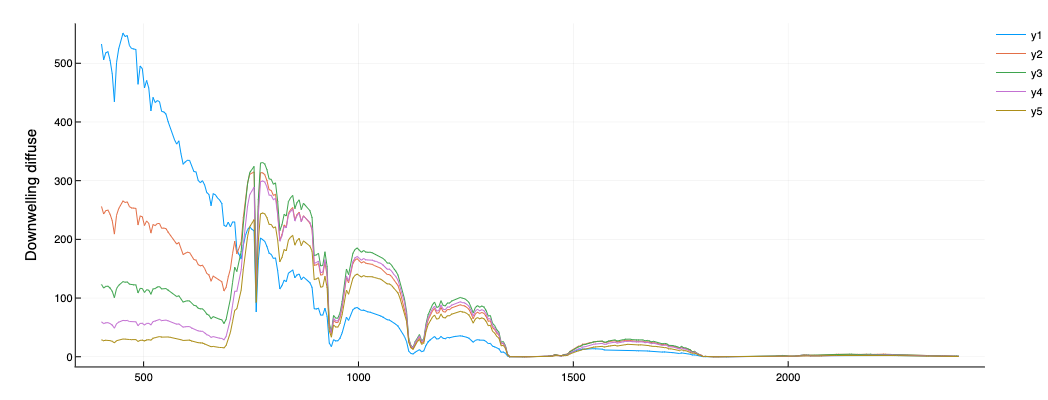

In [10]:
#plot(FluspectMod.wl,FluspectMod.canRad.E_up[1:5:end,:]')
# Diffuse radiation within the canopy, need to add realistic incoming spectrum still!
plot(FluspectMod.wl,FluspectMod.canRad.E_down[1:5:end,:]')
ylabel!("Downwelling diffuse")

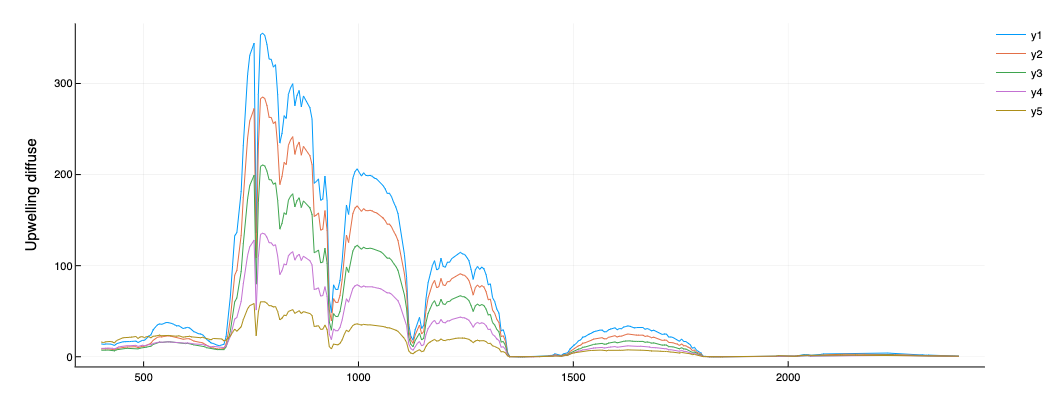

In [11]:
plot(FluspectMod.wl,FluspectMod.canRad.E_up[1:5:end,:]')
ylabel!("Upwelling diffuse")

### Computed albedo for direct and diffuse radiation

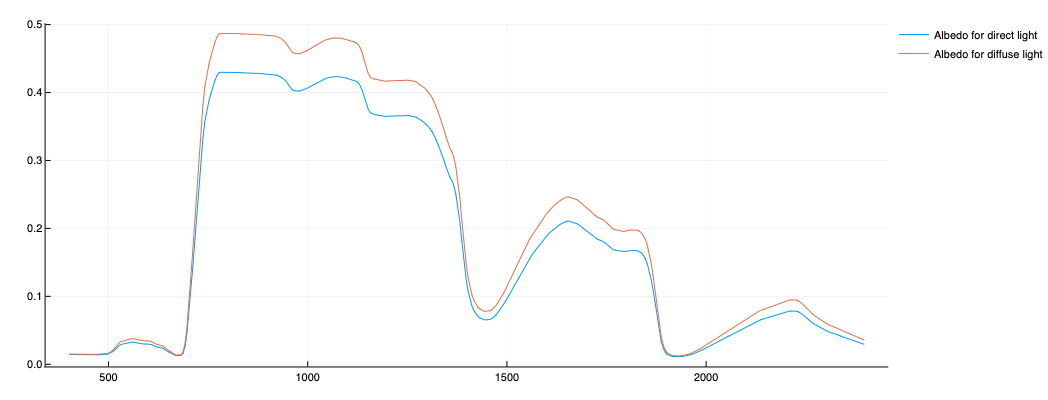

In [12]:
plot(FluspectMod.wl,FluspectMod.canRad.alb_direct, label="Albedo for direct light")
plot!(FluspectMod.wl,FluspectMod.canRad.alb_diffuse, label="Albedo for diffuse light")

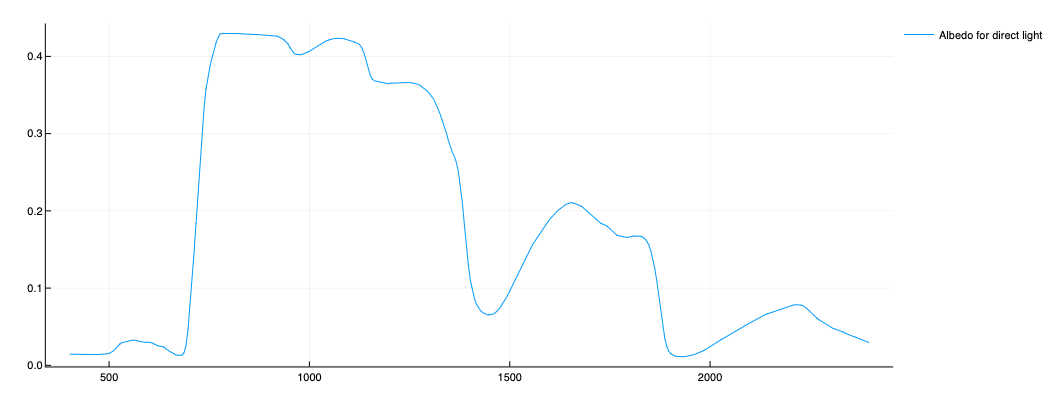

In [13]:
plot(FluspectMod.wl,FluspectMod.canRad.alb_direct, label="Albedo for direct light")

In [14]:
# Just checking PAR values here
println("Total PAR   ", FluspectMod.canRad.PAR*1e6)
println("Diffuse PAR ", FluspectMod.canRad.PAR_diffuse*1e6)
println("Direct PAR  ", FluspectMod.canRad.PAR_direct*1e6)

Total PAR   1398.0050571262836
Diffuse PAR 521.389301866293
Direct PAR  876.6158134676516


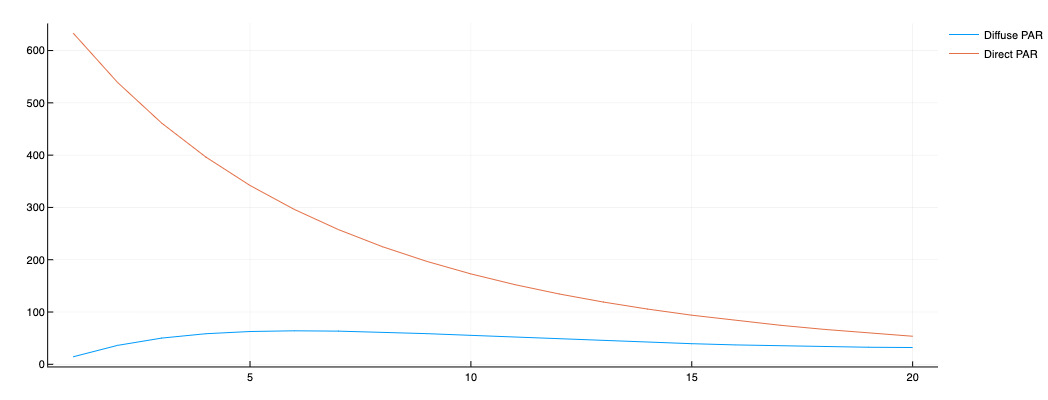

In [15]:
plot((1 .-FluspectMod.canRad.Ps[1:end-1]).*FluspectMod.canRad.Pnh_Cab*1E6, label="Diffuse PAR")
plot!(FluspectMod.canRad.Ps[1:end-1].*mean(FluspectMod.canRad.Pnu_Cab*1e6, dims=1:2)[1,1,:],label="Direct PAR")

#plot!(FluspectMod.canRad.Pso)

In [17]:
@benchmark FluspectMod.RTM_sail!(FluspectMod.leaf, FluspectMod.canopy, FluspectMod.angle, FluspectMod.canRad,FluspectMod.sunRad)

BenchmarkTools.Trial: 
  memory estimate:  1.92 MiB
  allocs estimate:  7986
  --------------
  minimum time:     2.487 ms (0.00% GC)
  median time:      2.785 ms (0.00% GC)
  mean time:        2.992 ms (5.83% GC)
  maximum time:     8.946 ms (60.38% GC)
  --------------
  samples:          1667
  evals/sample:     1

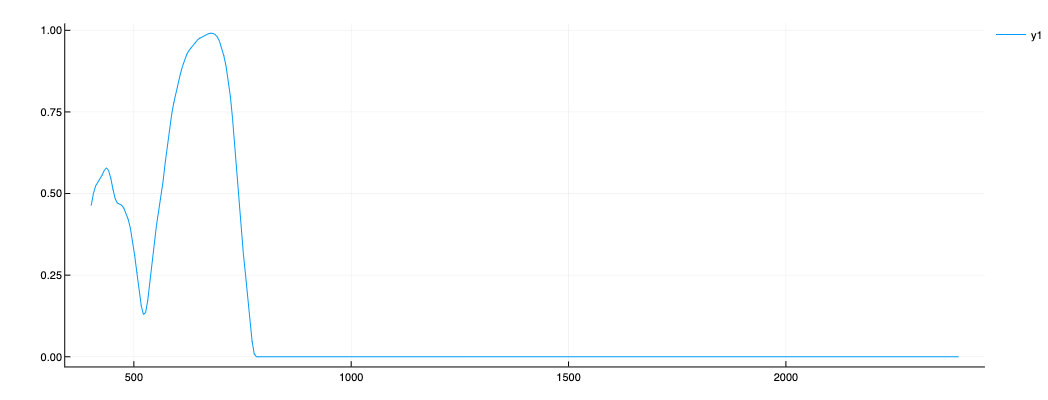

In [18]:
plot(FluspectMod.wl, FluspectMod.leaf.kChlrel)

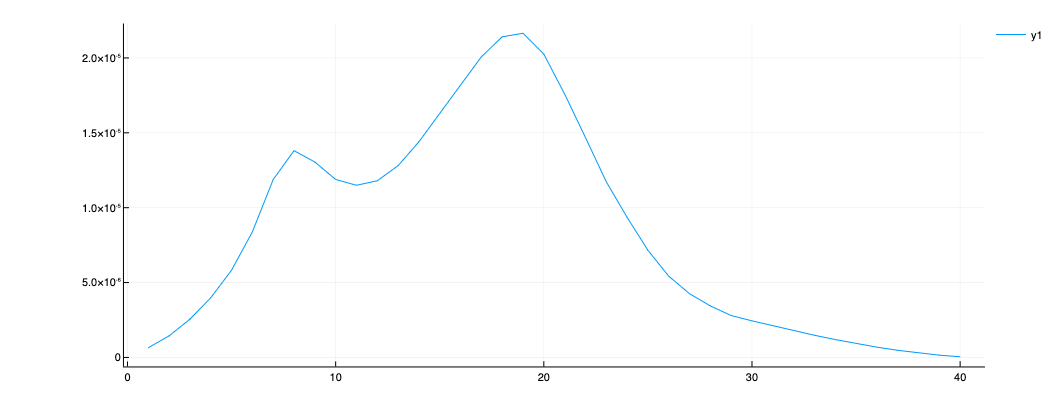

In [47]:
plot(FluspectMod.leaf.Mb[:,10])

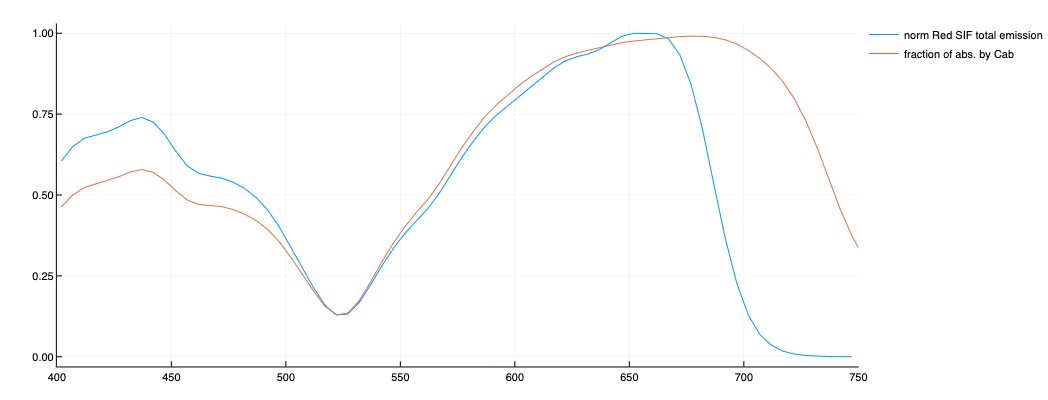

In [49]:
ind = 8
emi = (FluspectMod.leaf.Mb[ind,:]+FluspectMod.leaf.Mf[ind,:])
plot(FluspectMod.wle,emi/maximum(emi), label="norm Red SIF total emission")
plot!(FluspectMod.wl, FluspectMod.leaf.kChlrel, label="fraction of abs. by Cab")
xlims!(400,750)

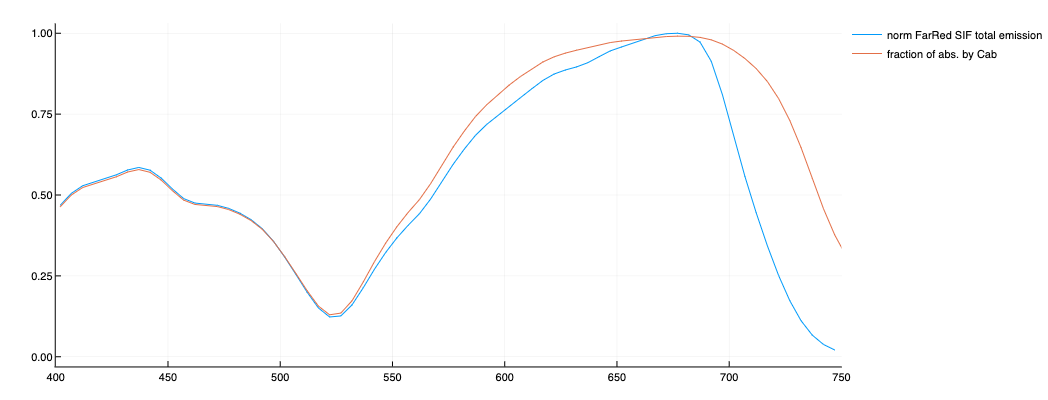

In [50]:
ind = 19
emi = (FluspectMod.leaf.Mb[ind,:]+FluspectMod.leaf.Mf[ind,:])
plot(FluspectMod.wle,emi/maximum(emi), label="norm FarRed SIF total emission")
plot!(FluspectMod.wl, FluspectMod.leaf.kChlrel, label="fraction of abs. by Cab")
xlims!(400,750)

In [53]:
@benchmark cosd.(FluspectMod.litab)

BenchmarkTools.Trial: 
  memory estimate:  144 bytes
  allocs estimate:  1
  --------------
  minimum time:     124.543 ns (0.00% GC)
  median time:      129.775 ns (0.00% GC)
  mean time:        137.207 ns (4.63% GC)
  maximum time:     2.695 μs (94.72% GC)
  --------------
  samples:          10000
  evals/sample:     893